<a href="https://colab.research.google.com/github/lopes-adriano/machine-learning/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de ML - Aprendizado supervisionado

Aluno: Adriano Ferreira Lopes

Matrícula: 201802671

## SVM (Support Vector Machine)

### Introdução

O Support Vector Machine (SVM) é um modelo de aprendizado de máquina que se destaca em tarefas de classificação e regressão. No contexto de classificação, o SVM procura encontrar o hiperplano de decisão que maximiza a margem entre diferentes classes. A margem é definida como a distância entre o hiperplano e os pontos de dados mais próximos de cada classe, chamados de vetores de suporte. Além disso, o SVM pode lidar com dados não linearmente separáveis por meio do uso de funções de kernel, que mapeiam os dados para um espaço de características de maior dimensão.

### Aplicações

- Classificação Binária e Multiclasse: O SVM é amplamente utilizado para problemas de classificação com duas ou mais classes.

- Regressão: Em tarefas de regressão, o SVM pode ser aplicado para prever valores numéricos.

- Detecção de Anomalias: Pode ser utilizado para identificar padrões anômalos em conjuntos de dados.

### Vantagens

1. Eficiente em Espaços de Alta Dimensão: O SVM mantém sua eficácia em espaços de características de alta dimensão, sendo útil em tarefas com muitas características.

2. Versatilidade com Kernels: A capacidade de utilizar funções de kernel permite ao SVM lidar com dados não linearmente separáveis e capturar relações complexas.

3. Regularização Incorporada: A regularização no SVM ajuda a evitar overfitting, tornando-o mais robusto.

### Desvantagens

1. Sensível à Escala e Hiperparâmetros: O desempenho do SVM pode depender da escala dos dados e da escolha adequada dos hiperparâmetros.

2. Interpretação Complexa em Espaços de Alta Dimensão: Em espaços de alta dimensão, interpretar as fronteiras de decisão pode ser desafiador.

### Exemplo de código

In [29]:
#Importando bibliotecas
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [30]:
# Carregando o conjunto de dados Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Usando apenas duas características para visualização
y = iris.target

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Criando e treinando o modelo SVM
model = SVC(kernel='linear', C=1, random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

In [32]:
# Avaliando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do Modelo: {accuracy:.2f}')

Acurácia do Modelo: 0.90


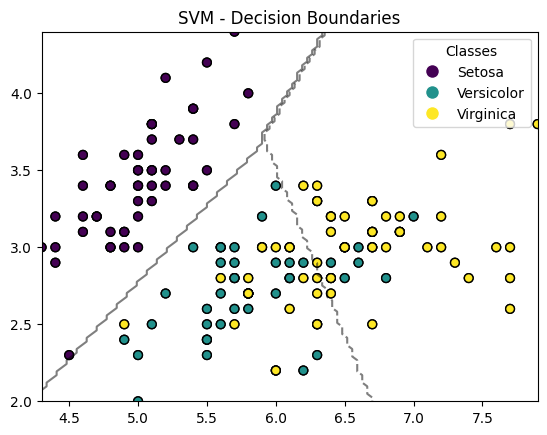

In [33]:
# Visualizando as fronteiras de decisão
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=40, edgecolors='k', marker='o')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=40, edgecolors='k', marker='o')

# Criando uma grade de pontos para plotar as fronteiras
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Fazendo previsões no grid
Z = model.predict(grid)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
legend_labels = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10, label=legend_labels[label]) for label in legend_labels]

plt.legend(handles=handles, title='Classes')

plt.title('SVM - Decision Boundaries')
plt.show()